In [1]:
%matplotlib inline

# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.ioff()

# File to Load (Remember to change these)

city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

combined_df = pd.merge(ride_data, city_data, on = "city", how = "left")

# Display the data table for preview

combined_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

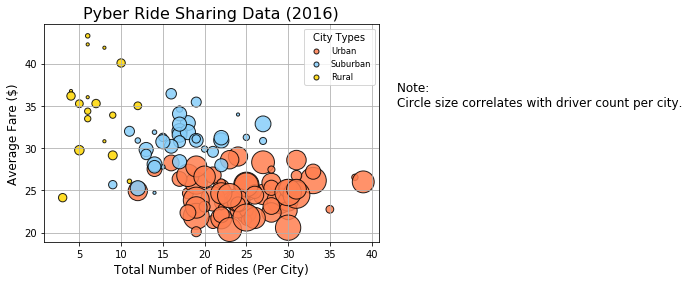

In [2]:
# Obtain the x and y coordinates for each of the three city types

# Let's check what types do we have

types = combined_df["type"].value_counts()

# Obtain the data frame for the Urban city type and then group the data frame by city

urban_city_type = combined_df.loc[combined_df["type"] == "Urban"]
urban_city_type = urban_city_type.groupby(["city"])

# Obtain the data frame for the Rural city type and then group the data frame by city

rural_city_type = combined_df.loc[combined_df["type"] == "Rural"]
rural_city_type = rural_city_type.groupby(["city"])

# Obtain the data frame for the Suburban city type and then group the data frame by city

suburban_city_type = combined_df.loc[combined_df["type"] == "Suburban"]
suburban_city_type = suburban_city_type.groupby(["city"])


# Urban calculations of ride count (x), fare average(y), max driver count (s - scalar value, as size)

x_urban = urban_city_type["ride_id"].count()
y_urban = urban_city_type["fare"].mean()
s_urban = urban_city_type["driver_count"].max()

# Suburban calculations of ride count (x), fare average(y), max driver count (s - scalar value, as size)

x_suburban = suburban_city_type["ride_id"].count()
y_suburban = suburban_city_type["fare"].mean()
s_suburban = suburban_city_type["driver_count"].max()

# Rural calculations of ride count (x), fare average(y), max driver count (s - scalar value, as size)

x_rural = rural_city_type["ride_id"].count()
y_rural = rural_city_type["fare"].mean()
s_rural = rural_city_type["driver_count"].max()

# Build the scatter plots for each city types

plt.scatter(x_urban, y_urban, marker = "o", facecolors = "coral", edgecolors = "black", s = s_urban * 10 , alpha = 0.85, linewidths = 1, label = "Urban")
plt.scatter(x_suburban, y_suburban, marker = "o", facecolors = "lightskyblue", edgecolors = "black", s = s_suburban * 10, alpha = 0.85, linewidths = 1, label = "Suburban")
plt.scatter(x_rural, y_rural, marker = "o", facecolors = "gold", edgecolors = "black", s = s_rural * 10, alpha = 0.85, linewidths = 1, label = "Rural")

# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)", fontsize = 16)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)
plt.ylabel("Average Fare ($)", fontsize = 12)
plt.grid()

# Create a legend

legend = plt.legend(title = "City Types", loc = "upper right", fontsize = "small")
legend.legendHandles[0]._sizes = [25]
legend.legendHandles[1]._sizes = [25]
legend.legendHandles[2]._sizes = [25]

# Incorporate a text label regarding circle size

plt.text(43, 35, "Note: \nCircle size correlates with driver count per city.", fontsize = 12)

# Save Figure

plt.savefig("Images/Pyber_Ride_Sharing_Data_2016.png", bbox_inches = "tight")

# Show plot

plt.show()


## Total Fares by City Type

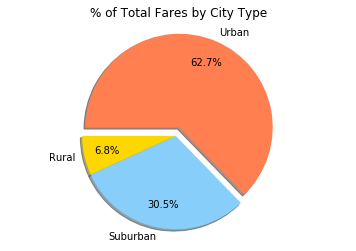

In [103]:
# Calculate Type Percents

total_fares = combined_df.groupby(["type"]) # ["fare"].sum() - can make counts in 1 line 
total_fares = total_fares["fare"].sum()

# Build Pie Chart

types = ["Rural", "Suburban", "Urban"]

sizes = total_fares

colors = ["gold", "lightskyblue", "coral"]

explode = [0, 0, 0.1]

plt.pie(sizes, explode = explode, labels = types, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 180, pctdistance=0.75)

plt.axis("equal")

plt.title("% of Total Fares by City Type")

# Save Figure

plt.savefig("Images/Percentage_of_total_fares_by_city_type.png")


## Total Rides by City Type

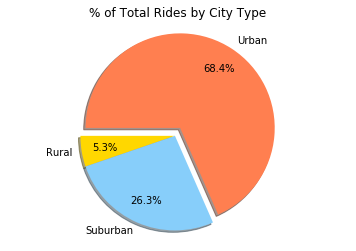

In [104]:
# Calculate Ride Percents

total_rides = combined_df.groupby(["type"]) # ["ride_id"].count() - can make counts in 1 line 
total_rides = total_rides["ride_id"].count()
total_rides

# Build Pie Chart

types = ["Rural", "Suburban", "Urban"]

sizes = total_rides

colors = ["gold", "lightskyblue", "coral"]

explode = [0, 0, 0.1]

plt.pie(sizes, explode = explode, labels = types, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 180, pctdistance=0.75)

plt.axis("equal")

plt.title("% of Total Rides by City Type")

# Save Figure

plt.savefig("Images/Percentage_of_total_rides_by_city_type.png")


## Total Drivers by City Type

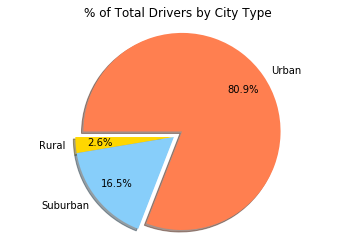

In [105]:
# Calculate Driver Percents

total_drivers = city_data.groupby(["type"]) # ["driver_count"].sum() - can make counts in 1 line 
total_drivers = total_drivers["driver_count"].sum()

# Build Pie Charts

types = ["Rural", "Suburban", "Urban"]

sizes = total_drivers

colors = ["gold", "lightskyblue", "coral"]

explode = [0, 0, 0.1]

plt.pie(total_drivers, explode = explode, labels = types, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 180, pctdistance=0.75)

plt.axis("equal")

plt.title("% of Total Drivers by City Type")

# Save Figure

plt.savefig("Images/Percentage_of_total_drivers_by_city_type.png")
